In [1]:
# gamma parameter defines how far the influence of a single training example reaches, 
# with low values meaning ‘far’ and high values meaning ‘close’.

# For large values of C, the optimization will choose a smaller-margin hyperplane if that 
# hyperplane does a better job of getting all the training points classified correctly. 
# Conversely, a very small value of C will cause the optimizer to look for a larger-margin 
# separating hyperplane, even if that hyperplane misclassifies more points.

# Polynomial and exponential kernels calculates separation line in higher dimension. 
# This is called kernel trick. Kernel creating transformation on existing features to draw decision boundaries

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df.head()

In [5]:
df['target'] = iris.target

In [6]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [7]:
# Apply a function along an axis of the DataFrame
# 0 -> setosa, 1 -> versicolor, 2 -> virginica
df['name'] = df.target.apply(lambda x: iris.target_names[x])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


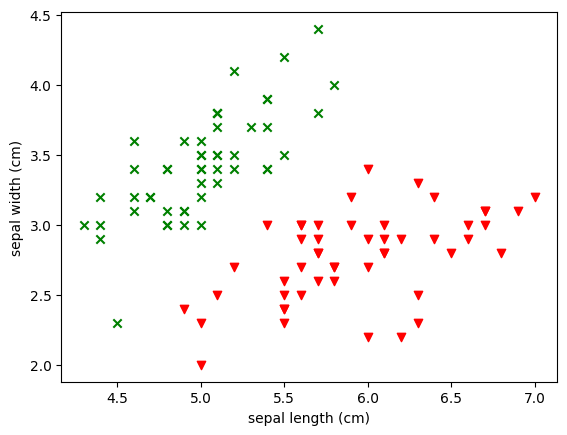

In [9]:
# plot flowers sepal for svm separation
plt.scatter(df.iloc[:50]['sepal length (cm)'],df.iloc[:50]['sepal width (cm)'], color='green',marker='x')
plt.scatter(df.iloc[50:100]['sepal length (cm)'],df.iloc[50:100]['sepal width (cm)'], color='red',marker='v')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

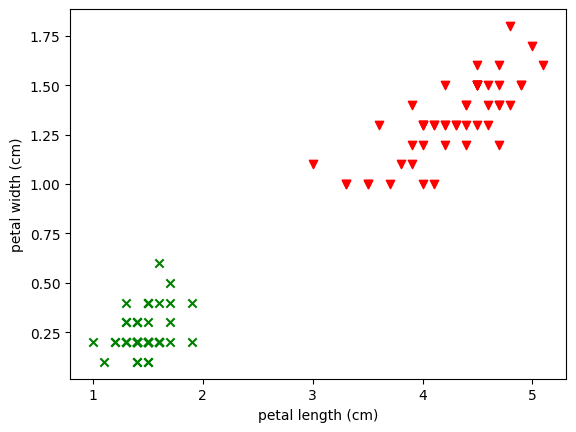

In [10]:
# plot flowers petal for svm separation
plt.scatter(df.iloc[:50]['petal length (cm)'],df.iloc[:50]['petal width (cm)'], color='green',marker='x')
plt.scatter(df.iloc[50:100]['petal length (cm)'],df.iloc[50:100]['petal width (cm)'], color='red',marker='v')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','name'],axis=1),df.target,test_size=0.2)

In [12]:
model = SVC(C=0.1,gamma='auto',kernel='poly')
model.fit(X_train,y_train)

SVC(C=0.1, gamma='auto', kernel='poly')

In [13]:
model.predict(X_test)

array([1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 2, 2, 2, 2, 1])

In [14]:
model.score(X_test,y_test)

0.9333333333333333